# Linear regression homework with Yelp votes

## Introduction

This assignment uses a small subset of the data from Kaggle's [Yelp Business Rating Prediction](https://www.kaggle.com/c/yelp-recsys-2013) competition.

**Description of the data:**

- `yelp.json` is the original format of the file. `yelp.csv` contains the same data, in a more convenient format. Both of the files are in this repo, so there is no need to download the data from the Kaggle website.
- Each observation in this dataset is a review of a particular business by a particular user.
- The "stars" column is the number of stars (1 through 5) assigned by the reviewer to the business. (Higher stars is better.) In other words, it is the rating of the business by the person who wrote the review.
- The "cool" column is the number of "cool" votes this review received from other Yelp users. All reviews start with 0 "cool" votes, and there is no limit to how many "cool" votes a review can receive. In other words, it is a rating of the review itself, not a rating of the business.
- The "useful" and "funny" columns are similar to the "cool" column.

## Task 1

Read `yelp.csv` into a DataFrame.

In [1]:
# access yelp.csv using a relative path
import pandas as pd
yelp = pd.read_csv('../data/yelp.csv')
yelp.head(1)

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny
0,9yKzy9PApeiPPOUJEtnvkg,2011-01-26,fWKvX83p0-ka4JS3dc6E5A,5,My wife took me here on my birthday for breakf...,review,rLtl8ZkDX5vH5nAx9C3q5Q,2,5,0


## Task 1 (Bonus)

Ignore the `yelp.csv` file, and construct this DataFrame yourself from `yelp.json`. This involves reading the data into Python, decoding the JSON, converting it to a DataFrame, and adding individual columns for each of the vote types.

In [2]:
# read the data from yelp.json into a list of rows
# each row is decoded into a dictionary named "data" using using json.loads()
import json
with open('../data/yelp.json', 'rU') as f:
    data = [json.loads(row) for row in f]

In [19]:
# show the first review
from pprint import pprint

print(str(type(data)) + '\n')
pprint(data[0])

<type 'list'>

{u'business_id': u'9yKzy9PApeiPPOUJEtnvkg',
 u'date': u'2011-01-26',
 u'review_id': u'fWKvX83p0-ka4JS3dc6E5A',
 u'stars': 5,
 u'text': u'My wife took me here on my birthday for breakfast and it was excellent.  The weather was perfect which made sitting outside overlooking their grounds an absolute pleasure.  Our waitress was excellent and our food arrived quickly on the semi-busy Saturday morning.  It looked like the place fills up pretty quickly so the earlier you get here the better.\n\nDo yourself a favor and get their Bloody Mary.  It was phenomenal and simply the best I\'ve ever had.  I\'m pretty sure they only use ingredients from their garden and blend them fresh when you order it.  It was amazing.\n\nWhile EVERYTHING on the menu looks excellent, I had the white truffle scrambled eggs vegetable skillet and it was tasty and delicious.  It came with 2 pieces of their griddled bread with was amazing and it absolutely made the meal complete.  It was the best "toast" I

In [20]:
# convert the list of dictionaries to a DataFrame
yelp2 = pd.DataFrame(data)

In [24]:
# add DataFrame columns for cool, useful, and funny
yelp2 = pd.concat([yelp2.drop(['votes'], axis=1), yelp2['votes'].apply(pd.Series)], axis=1)

In [28]:
# drop the votes column and then display the head

print 'see above'

see above


## Task 2

Explore the relationship between each of the vote types (cool/useful/funny) and the number of stars.

In [30]:
yelp.head(1)

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny
0,9yKzy9PApeiPPOUJEtnvkg,2011-01-26,fWKvX83p0-ka4JS3dc6E5A,5,My wife took me here on my birthday for breakf...,review,rLtl8ZkDX5vH5nAx9C3q5Q,2,5,0


In [31]:
# treat stars as a categorical variable and look for differences between groups by
# comparing the means of the groups

yelp.groupby('stars').describe()

cool        funny       useful
stars                                             
1     count   749.000000   749.000000   749.000000
      mean      0.576769     1.056075     1.604806
      std       1.474759     2.480309     2.302354
      min       0.000000     0.000000     0.000000
      25%       0.000000     0.000000     0.000000
      50%       0.000000     0.000000     1.000000
      75%       1.000000     1.000000     2.000000
      max      17.000000    30.000000    20.000000
2     count   927.000000   927.000000   927.000000
      mean      0.719525     0.875944     1.563107
      std       1.491182     1.837553     1.969546
      min       0.000000     0.000000     0.000000
      25%       0.000000     0.000000     0.000000
      50%       0.000000     0.000000     1.000000
      75%       1.000000     1.000000     2.000000
      max      14.000000    20.000000    17.000000
3     count  1461.000000  1461.000000  1461.000000
      mean      0.788501     0.694730     1.306639
      std       1.602576     1.643553     1.985327
      min       0.000000     0.000000     0.000000
      25%       0.000000     0.000000     0.000000
      50%       0.000000     0.000000     1.000000
      75%       1.000000     1.000000     2.000000
      max      18.000000    24.000000    19.000000
4     count  3526.000000  3526.000000  3526.000000
      mean      0.954623     0.670448     1.395916
      std       2.034367     1.962417     2.236087
      min       0.000000     0.000000     0.000000
      25%       0.000000     0.000000     0.000000
      50%       0.000000     0.000000     1.000000
      75%       1.000000     1.000000     2.000000
      max      38.000000    57.000000    38.000000
5     count  3337.000000  3337.000000  3337.000000
      mean      0.944261     0.608631     1.381780
      std       2.484583     1.815606     2.659065
      min       0.000000     0.000000     0.000000
      25%       0.000000     0.000000     0.000000
      50%       0.000000     0.000000     1.000000
      75%       1.000000     1.000000     2.000000
      max      77.000000    39.000000    76.000000

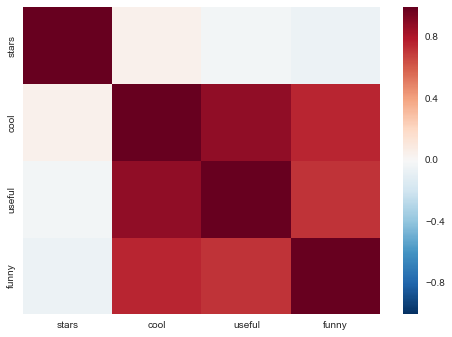

In [32]:
# display acorrelation matrix of the vote types (cool/useful/funny) and stars
%matplotlib inline
import seaborn as sns
sns.heatmap(yelp.corr())

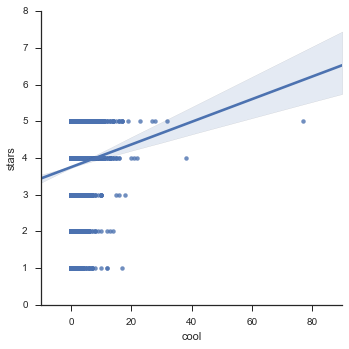

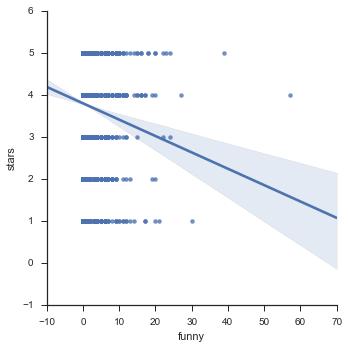

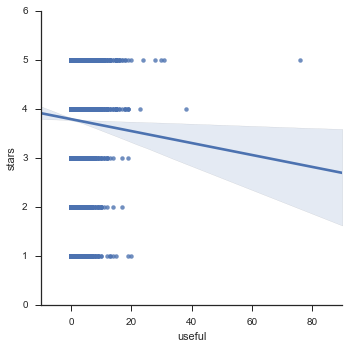

In [41]:
# display multiple scatter plots (cool, useful, funny) with linear regression line

import seaborn as sns
sns.set(style="ticks")

for col in ['cool', 'funny', 'useful']:
    sns.lmplot(col, "stars", data=yelp)

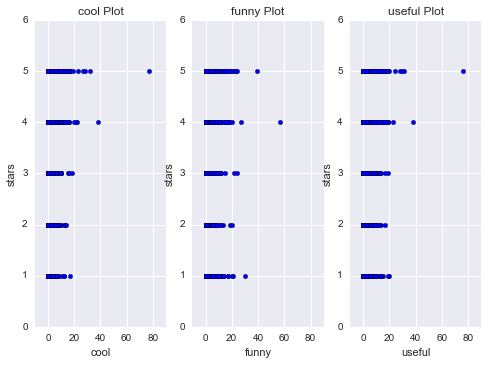

In [36]:
# display multiple scatter plots (cool, useful, funny) with linear regression line
import matplotlib.pyplot as plt

fig, axes = plt.subplots(nrows=1, ncols=3, sharex=True)

for i, col in enumerate(['cool', 'funny', 'useful']):
    yelp.plot(
        kind='scatter',
        color='Blue', 
        x=col,
        y='stars',
        ax=axes[i],
        title='{} Plot'.format(col)
    )


## Task 3

Define cool/useful/funny as the feature matrix X, and stars as the response vector y.

In [42]:
X = yelp[['cool', 'useful', 'funny']]

y = yelp.stars

## Task 4

Fit a linear regression model and interpret the coefficients. Do the coefficients make intuitive sense to you? Explore the Yelp website to see if you detect similar trends.

In [46]:
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()

linreg.fit(X, y)

print linreg.coef_
print linreg.intercept_
print linreg.residues_

[ 0.27435947 -0.14745239 -0.13567449]
3.83989479278
14098.8270918


/Users/glpeterkin/anaconda3/envs/python2/lib/python2.7/site-packages/sklearn/utils/__init__.py:93: DeprecationWarning: Function residues_ is deprecated; ``residues_`` is deprecated and will be removed in 0.19
  warnings.warn(msg, category=DeprecationWarning)


## Task 5

Evaluate the model by splitting it into training and testing sets and computing the RMSE. Does the RMSE make intuitive sense to you?

In [47]:
from sklearn.cross_validation import train_test_split
from sklearn import metrics
import numpy as np

In [48]:
# define a function that accepts a list of features and returns testing RMSE
def train_test_rmse(features):
    X = yelp[features]
    y = yelp.stars
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=123)
    
    linreg = LinearRegression()
    linreg.fit(X_train, y_train)
    y_pred = linreg.predict(X_test)
    return np.sqrt(metrics.mean_squared_error(y_test, y_pred))

In [49]:
# calculate RMSE with all three features
train_test_rmse(['cool', 'useful', 'funny'])

1.1733686274194506

## Task 6

Try removing some of the features and see if the RMSE improves.

In [50]:
features = {
    'all': ['cool', 'useful', 'funny'],
    'c&u': ['cool', 'useful'],
    'c&f': ['cool', 'funny'],
    'u&f': ['useful', 'funny'],
    'c': ['cool'],
    'u': ['useful'],
    'f': ['funny']
}

for desc, feature in features.items():
    print desc
    print train_test_rmse(feature)

# It doesn't improve it's best to use all of them

all
1.17336862742
f
1.20043591364
c&f
1.1851949299
c
1.20049049928
u&f
1.20070113589
u
1.20143488625
c&u
1.18537944234


## Task 7 (Bonus)

Think of some new features you could create from the existing data that might be predictive of the response. Figure out how to create those features in Pandas, add them to your model, and see if the RMSE improves.

In [ ]:
# new feature: 

# One could try using date, but that doesn't seem to really help the model
# The most logical way would be to try to extract patterns from the text
# a super simple one would be counting the characters in the description or the avg word length

In [ ]:
# new features: 


In [ ]:
# add new features to the model and calculate RMSE


## Task 8 (Bonus)

Compare your best RMSE on the testing set with the RMSE for the "null model", which is the model that ignores all features and simply predicts the mean response value in the testing set.